In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, brier_score_loss
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import dtreeviz

from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

In [31]:
data = pd.read_csv("./augmented_data.csv")
df = data[["player", "is_goal"]]
df["gender"] = data["competition_id"].apply(lambda x: 1 if x in ["FA Women's Super League", "Women's World Cup", "NWSL", "UEFA Women's Euro"] else 0)
df

,player,is_goal,gender
0,Francesca Kirby,False,1
1,Francesca Kirby,False,1
2,So-Yun Ji,False,1
3,Drew Spence,False,1
4,Millie Bright,True,1
...,...,...,...
83924,Sébastien Haller,False,0
83925,Sébastien Haller,True,0
83926,Kelechi Promise Iheanacho,False,0
83927,Wilfried Stephane Singo,False,0


In [22]:
data = data.dropna()
y = df['gender']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['player'])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=20)
X_train, y_train = SMOTE(sampling_strategy=0.75).fit_resample(X_train, y_train)

In [49]:
def calculate_stats(results_test, results_pred, name):
    cm = confusion_matrix(results_test, results_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Male", "Female"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({name})')
    plt.show()

    print(f"\n{name}")
    accuracy = accuracy_score(results_test, results_pred)
    precision = precision_score(results_test, results_pred)
    recall = recall_score(results_test, results_pred)
    f1 = f1_score(results_test, results_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)

In [50]:
def logistic_regression():
    logistic_r = LogisticRegression()
    logistic_r.fit(X_train, y_train)
    y_pred = logistic_r.predict(X_test)

    calculate_stats(y_test, y_pred, "Logistic Regression")

    return logistic_r.predict_proba(X_test)

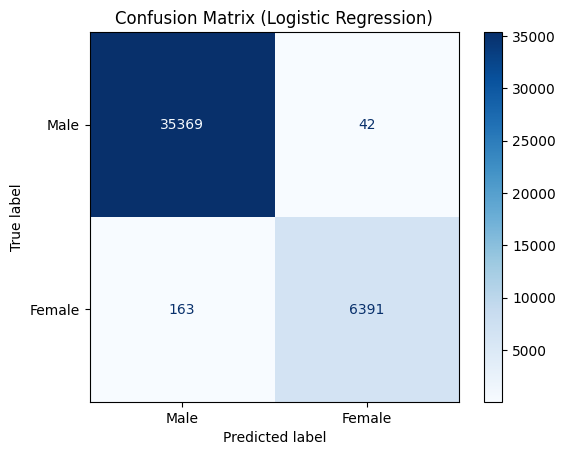


Logistic Regression
Accuracy: 0.995114976766353
Precision: 0.9934711643090316
Recall: 0.9751296917912725
F1: 0.9842149842149842


In [51]:
prediction = logistic_regression()